The Olist store is an e-commerce business headquartered in Sao Paulo, Brazil. This firm acts as a single point of contact between various small businesses and the customers who wish to buy their products. 

Objectve --
When we shop online, we often read reviews to help decide what to buy. These reviews are written by other customers who have already bought the product. Olist can use these reviews to make their store better. 
We try to determine the overall satisfaction of the customer with the product which he or she had just purchased. We can convert this aspect into a binary classification problem by treating the 4 and 5-star ratings as the positive class and the rest as the negative class.

In [19]:
import pandas as pd
import numpy as np
df=pd.read_csv("../data/olist_customers_dataset.csv")
df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [20]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [21]:
df.shape

(115609, 33)

In [4]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [22]:
# 1. Missing data
# Identifying how many datas are missing
null_values=df.isnull().sum()
print(null_values[null_values>0])

order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
review_comment_message           66703
dtype: int64


Dropping all the duplicates which have the same Order ID, Customer ID, purchase timestamp, review message. This is becasue a customer cannot post the same review multiple times for the same product at the same instant of time.

In [23]:
df = df.drop_duplicates(subset=['order_id','order_purchase_timestamp','product_id','customer_id','review_comment_message'])
df.shape

(100402, 33)

All the ID values are unique. We are dropping these columns since they don't contribute much to understanding the data. We also cannot work with

In [24]:
df.drop(['order_id','product_id','seller_id','customer_unique_id'], axis=1, inplace=True)
df.shape

(100402, 29)

In [25]:
df.dropna(subset=['shipping_limit_date','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], inplace=True)

The 'purchase delivery difference' gives us the number of days between the time of purchase and delivery. The 'estimated actual delivery difference' gives us the delay or the cut-down in the number of days actually required for the delivery.

In [26]:
from datetime import datetime
intermediate_time = df['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - df['order_purchase_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
df['purchase_delivery_difference'] = intermediate_time.apply(lambda x:x.days)

intermediate_time = df['order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - df['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
df['estimated_actual_delivery_difference'] = intermediate_time.apply(lambda x:x.days)

In [27]:
df.isnull().sum()


customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          13
order_delivered_carrier_date                0
order_delivered_customer_date               0
order_estimated_delivery_date               0
payment_sequential                          0
payment_type                                0
payment_installments                        0
payment_value                               0
customer_zip_code_prefix                    0
customer_city                               0
customer_state                              0
order_item_id                               0
shipping_limit_date                         0
price                                       0
freight_value                               0
product_category_name                       0
product_name_lenght                         0
product_description_lenght                  0
product_photos_qty                

Values that are rated more than 3 are labelled as positive and those whose values are 3 or below are labelled as negative.

In [28]:
df['review_score']=df['review_score'].apply(lambda x: 1 if x>3 else 0)
df['review_score']

0         1
3         1
4         1
5         0
6         0
         ..
115604    1
115605    0
115606    0
115607    1
115608    0
Name: review_score, Length: 98325, dtype: int64

In [29]:
df['order_status'].value_counts()

order_status
delivered    98318
canceled         7
Name: count, dtype: int64

It doesn't make sense to analyze those products which have been cancelled. Thus, we shall delete them

In [30]:
df = df[df['order_status'] != 'canceled']

In [ ]:
df.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_id'], axis=1, inplace=True)

We shall encode the categorical features which contain fewer categories using either ordinal or one hot encoding

In [31]:
df['review_comment_message'].value_counts()

review_comment_message
Muito bom                                                                                                                                                                                                   230
Bom                                                                                                                                                                                                         192
muito bom                                                                                                                                                                                                   124
bom                                                                                                                                                                                                         104
Otimo                                                                                                                                            

In [32]:
df['review_availability'] = df['review_comment_message'].apply(lambda x: 1 if x != 'indisponível' else 0)
df['review_availability']

0         1
3         1
4         1
5         1
6         1
         ..
115604    1
115605    1
115606    1
115607    1
115608    1
Name: review_availability, Length: 98318, dtype: int64

In [ ]:
X = df.drop(columns=['review_score'], axis=1)
Y=(df["review_score"])

In [17]:
df['order_purchase_timestamp']

0         2017-10-02 10:56:33
3         2017-08-15 18:29:31
4         2017-08-02 18:24:47
5         2017-10-23 23:26:46
6         2017-11-24 21:27:48
                 ...         
115604    2018-08-03 21:35:53
115605    2018-07-23 18:35:14
115606    2018-07-23 18:35:14
115607    2017-01-26 11:09:00
115608    2017-09-17 16:51:43
Name: order_purchase_timestamp, Length: 98318, dtype: object

In [18]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_duration'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['delivery_duration']


0          8
3          2
4          5
5         14
6         33
          ..
115604     6
115605     3
115606     3
115607    19
115608    11
Name: delivery_duration, Length: 98318, dtype: int64

In [11]:

less_important_columns = [
    'order_id', 'customer_zip_code_prefix', 'order_status', 
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'product_name_lenght', 
    'product_description_lenght', 'product_photos_qty', 
    
]

df=df.drop(columns=less_important_columns)
df.shape

(115609, 23)

In [10]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,1,1,18.12,1,29.99,8.72,500.0,19.0,8.0,13.0,4
1,3,1,2.00,1,29.99,8.72,500.0,19.0,8.0,13.0,4
2,2,1,18.59,1,29.99,8.72,500.0,19.0,8.0,13.0,4
3,1,3,37.77,1,29.99,7.78,500.0,19.0,8.0,13.0,4
4,1,1,37.77,1,29.99,7.78,500.0,19.0,8.0,13.0,5
...,...,...,...,...,...,...,...,...,...,...,...
115604,1,1,33.69,1,25.00,8.69,350.0,32.0,2.0,28.0,5
115605,1,1,84.63,1,19.00,12.86,500.0,16.0,6.0,16.0,3
115606,1,1,84.63,2,39.90,12.87,500.0,21.0,7.0,14.0,3
115607,1,1,209.06,1,183.29,25.77,1225.0,27.0,35.0,15.0,4


In [4]:
print(df["product_category_name_english"])

0                    housewares
1                    housewares
2                    housewares
3                    housewares
4                    housewares
                  ...          
115604    arts_and_craftmanship
115605    arts_and_craftmanship
115606    arts_and_craftmanship
115607    security_and_services
115608    security_and_services
Name: product_category_name_english, Length: 115609, dtype: object


In [33]:
category_counts = df['product_category_name_english'].value_counts()
top_categories = category_counts.head(10).reset_index()


top_categories.columns = ['product_category_name_english', 'count']
top_categories

,product_category_name_english,count
0,bed_bath_table,9963
1,health_beauty,8798
2,sports_leisure,7636
3,computers_accessories,6718
4,furniture_decor,6609
5,housewares,5848
6,watches_gifts,5629
7,telephony,4154
8,auto,3886
9,toys,3869


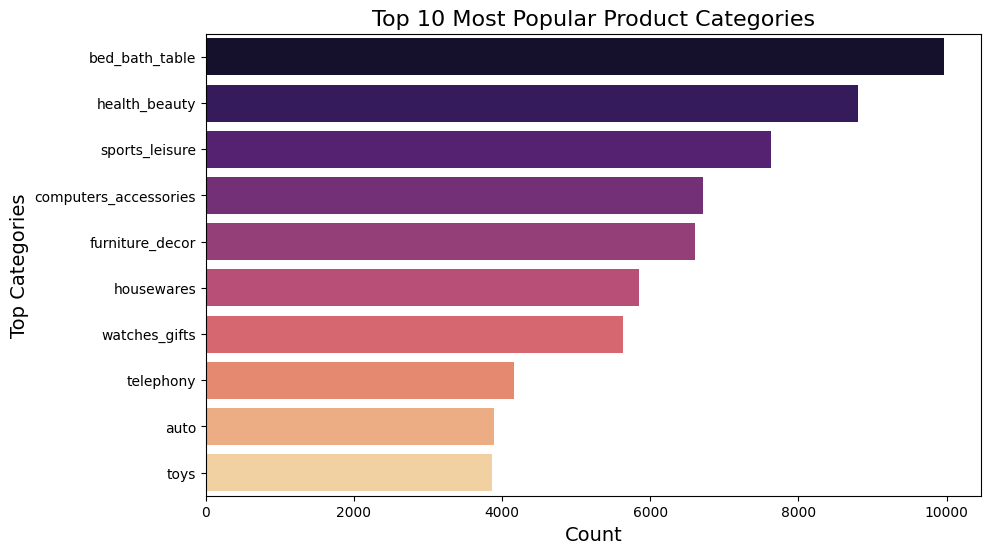

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_categories, 
    y='product_category_name_english', 
    x='count', 
    palette='magma', 
    hue='product_category_name_english', 
    dodge=False, 
    legend=False
)
plt.title('Top 10 Most Popular Product Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top Categories', fontsize=14)
plt.show()

In above chart We are now finding the top 10 most popular product categories in terms of the frequency of purchase. The category ‘bed bath table’ is significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. 

the business might consider expanding this line, offering discounts,

In [18]:
print(df['payment_value'])

0          18.12
1           2.00
2          18.59
3          37.77
4          37.77
           ...  
115604     33.69
115605     84.63
115606     84.63
115607    209.06
115608    115.45
Name: payment_value, Length: 115609, dtype: float64


In [35]:
print(df['customer_city'])

0                    sao paulo
3                    sao paulo
4                    sao paulo
5                florianopolis
6         presidente venceslau
                  ...         
115604          belo horizonte
115605                 diadema
115606                 diadema
115607          rolim de moura
115608                brasilia
Name: customer_city, Length: 98318, dtype: object


We are now finding the city which generates the highest revenue

In [30]:
city_revenue = df.groupby('customer_city')['payment_value'].sum()

top_cities= city_revenue.head(20).sort_values(ascending=False).reset_index()


top_cities.columns = ['customer_city', 'payment_value']
top_cities

,customer_city,payment_value
0,abaetetuba,6237.78
1,abreu e lima,5044.97
2,abaete,1896.54
3,acarau,1366.46
4,acailandia,1233.48
5,acopiara,1050.43
6,abadiania,1025.52
7,abelardo luz,797.58
8,abrantes,761.36
9,abadia dos dourados,413.50


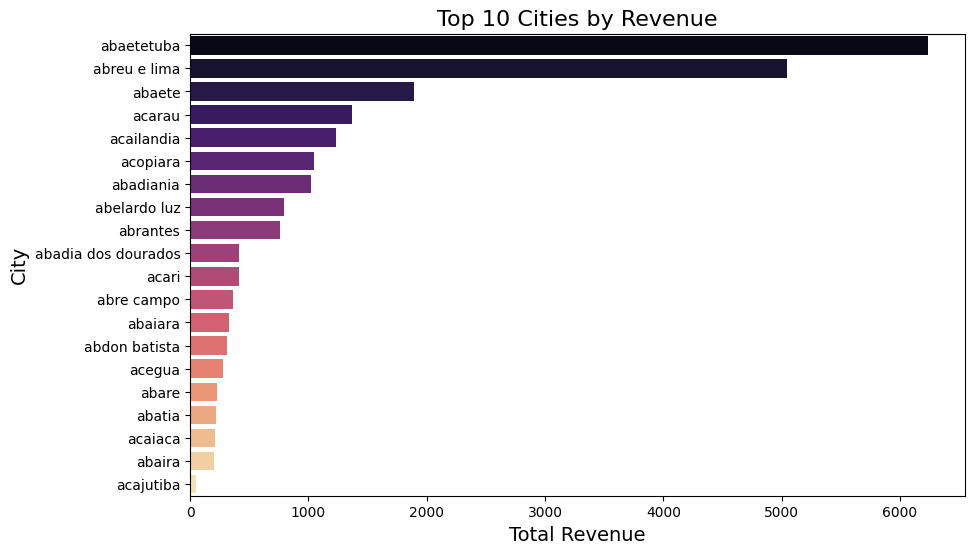

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_cities,
    
    y='customer_city', 
    x='payment_value', 
    palette='magma', 
    hue='customer_city', 
    dodge=False, 
    legend=False
)
plt.title('Top 10 Cities by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()

In [37]:

total_payment_value = df.groupby('product_category_name_english')['payment_value'].sum()


category_counts = df['product_category_name_english'].value_counts()


total_payment_value_df = total_payment_value.reset_index()
total_payment_value_df.columns = ['product_category_name_english', 'total_payment_value']

category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['product_category_name_english', 'count']

# Merge the total payment value and count DataFrames
merged_df = pd.merge(total_payment_value_df, category_counts_df, on='product_category_name_english')

# Calculate the average order value
merged_df['average_order_value'] = merged_df['total_payment_value'] / merged_df['count']
merged_df.sort_values(by='average_order_value', ascending=False).head(10)

,product_category_name_english,total_payment_value,count,average_order_value
14,computers,270046.41,217,1244.453502
34,fixed_telephony,206404.01,269,767.301152
64,small_appliances_home_oven_and_coffee,51229.32,78,656.786154
0,agro_industry_and_commerce,118730.61,252,471.153214
45,home_appliances_2,124423.64,268,464.267313
57,office_furniture,645927.93,1773,364.313553
62,signaling_and_security,68289.47,199,343.163166
19,construction_tools_safety,65646.80,198,331.549495
56,musical_instruments,230408.31,712,323.607177
63,small_appliances,224551.25,699,321.246423


The computers category has the highest AOV  (AVERAGE ORDER VALUE) which indicates customers are spending more on average in purchasing items from this category though from our previous analysis we discovered that bed_bath_table category is the most purchased category.
This means customers purchase more bed_bath_table items, but spend more money on items from the computers category. More marketing resources need to be allocated to low AOV categories to drive more traffic and encourage higher spending through discount offers.

In [36]:
numeric_cols= ['payment_sequential', 'payment_installments', 'payment_value',
       'order_item_id', 'price', 'freight_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

print(numeric_cols)

['payment_sequential', 'payment_installments', 'payment_value', 'order_item_id', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
